<h1 style="text-align: center;"> Práctica series temporales </h1>
<h1 style="text-align: center; font-size: 30px"> Daily gold price </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

# Presentación de la serie a analizar. 
El dataset que analizaremos contiene información histórica del precio del oro en el MCX Market, proporcionando una visión detallada sobre su comportamiento diario en el intervalo de años de 2015 a 2024.

Este conjunto de datos incluye registros diarios con variables clave como:

* $\textcolor{lime}{Date}$ (Fecha): Día en que se registró el precio del oro.
* $\textcolor{lime}{Price}$ (Precio de Cierre): Último precio registrado en el día.
* $\textcolor{lime}{Open}$ (Precio de Apertura): Valor del oro al inicio de la sesión en MCX.
* $\textcolor{lime}{Low}$ (Mínimo Diario): Mayor precio alcanzado dentro de la jornada de negociación.
* $\textcolor{lime}{High}$ (Máximo Diario): Mayor precio alcanzado dentro de la jornada de negociación.
* $\textcolor{lime}{Volume}$ (Volumen de Comercio): Representa el número de unidades del activo que han sido compradas y vendidas.
* $\textcolor{lime}{Chg\%}$ (Cambio diario): Cambio porcentual con respecto al día anterior.


# 2. Representación gráfica y descomposición de la misma. 

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')


In [30]:
dataset = pd.read_excel("bitcoin_A.xlsx")
dataset['DIA'] = pd.to_datetime(dataset['DIA'], format='%Y-%m-%d')
dataset.head()

,DIA,PRECIO,N_TRANS
0,2018-09-18,6296.631667,244259
1,2018-09-19,6335.826667,251037
2,2018-09-20,6418.562667,253674
3,2018-09-21,6669.990833,273051
4,2018-09-22,6709.312500,225537


In [31]:
dataset.index = dataset["DIA"]
dataset.index.freq = "D"
del dataset["DIA"]


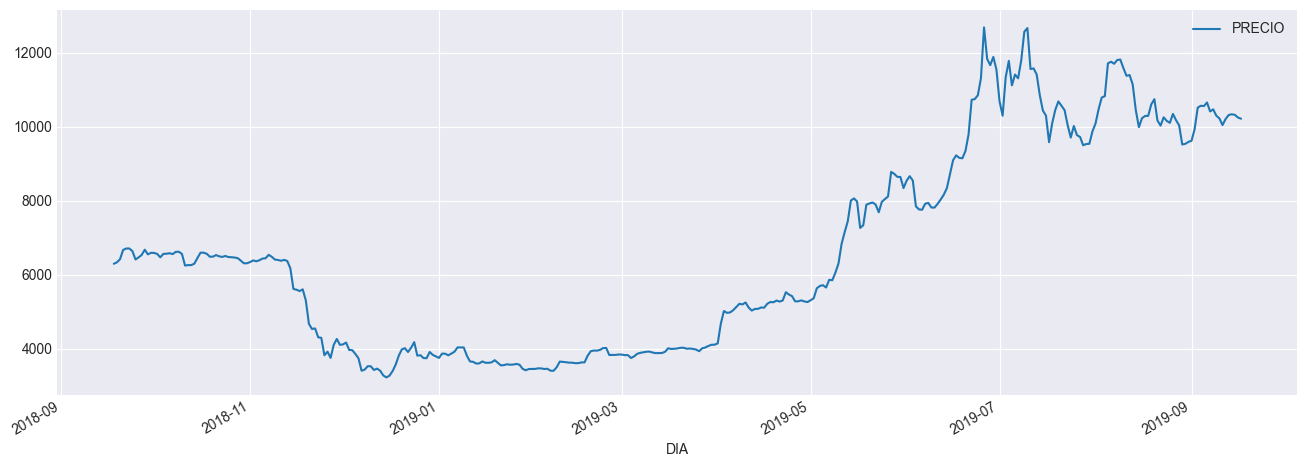

In [32]:

columnas_deseadas = ["PRECIO"]
df = dataset[columnas_deseadas]


plt.figure(figsize=(16,5))
sns.lineplot(df)
plt.xticks(rotation=30, ha="right")
plt.show()

## Análisis de la tendencia.
### Media movil.

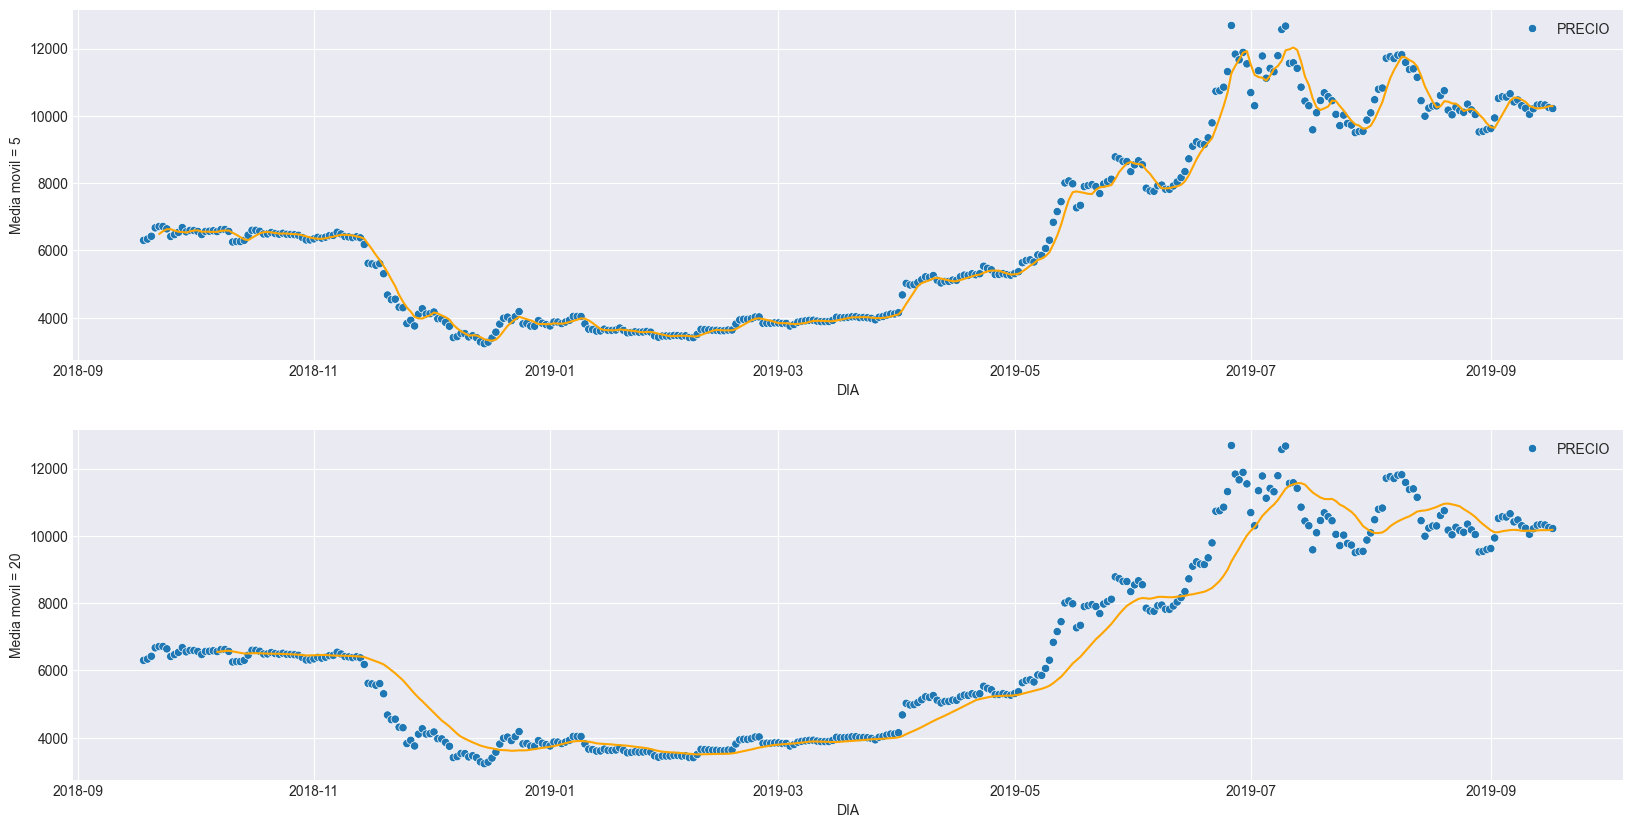

In [33]:
df_media_movil = df.loc[:]
df_media_movil["Media movil = 5"] = df.rolling(window=5).mean()
df_media_movil["Media movil = 20"] = df.rolling(window=20).mean()

fig, axes = plt.subplots(nrows=2, figsize=(20,10))

sns.lineplot(df_media_movil["Media movil = 5"], color="orange", ax=axes[0])
sns.scatterplot(df_media_movil[columnas_deseadas], ax=axes[0])


sns.lineplot(df_media_movil["Media movil = 20"], color="orange", ax=axes[1])
sns.scatterplot(df_media_movil[columnas_deseadas], ax=axes[1])


plt.show()

## Serie diferenciada.

(array([17789., 17805., 17819., 17836., 17850., 17866., 17880.]),
 [Text(17789.0, 0, '2018-09-15'),
  Text(17805.0, 0, '2018-10-01'),
  Text(17819.0, 0, '2018-10-15'),
  Text(17836.0, 0, '2018-11-01'),
  Text(17850.0, 0, '2018-11-15'),
  Text(17866.0, 0, '2018-12-01'),
  Text(17880.0, 0, '2018-12-15')])

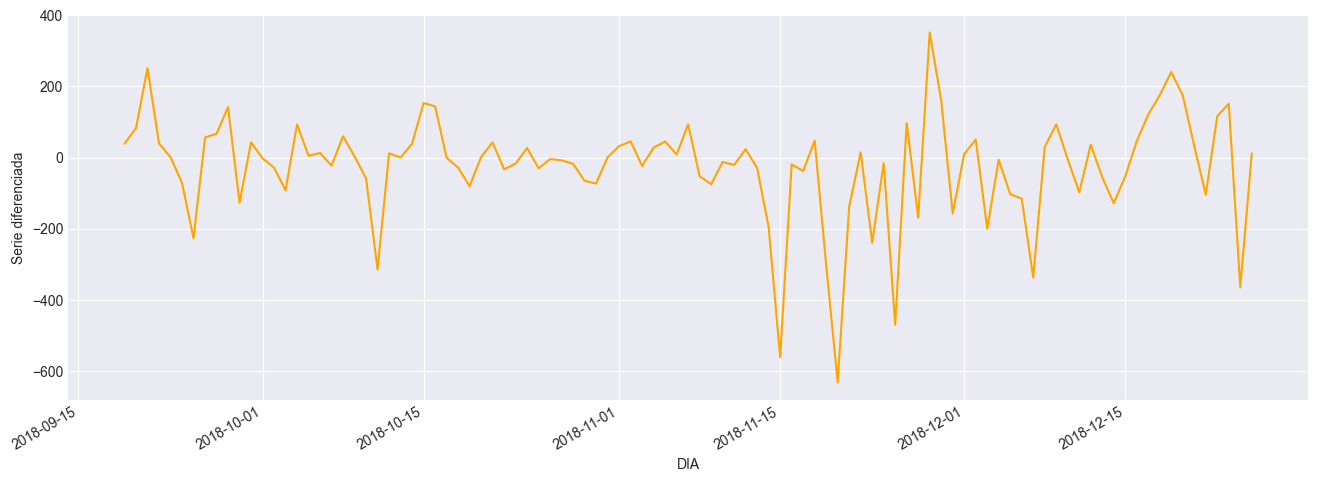

In [34]:
df_diferenciada = df.loc[:]
df_diferenciada["Serie diferenciada"] = df.diff(1)
plt.figure(figsize=(16,5))
sns.lineplot(df_diferenciada["Serie diferenciada"][:100], color="orange")


plt.xticks(rotation=30, ha="right")

# Autocovarianza
La autocovarianza mide la dependencia lineal entre dos puntos de la misma serie observados en distintos momentos. Series suaves muestran una funcion de covarianza que se mantiene con valores altos, incluso cuando los puntos que se miden están bastante alejados, mientras que series más bruscas tienden a tener un valor cercano a cero para separaciones muy altas. 
## La función de autocorrelación ACF.
Esta función mide la predictibidad de la serie para un momento *t*, usando el valor del momento *s*


# Series estacionarias. 
## Serie temporal estrictamente estacionaria. 
Es aquella donde se puede decir que esta relación es identica:
$$
{x_{t_1}, x_{t_2},..., x_{t_k}} =  {x_{t_{1+h}}, x_{t_{2+h}},..., x_{t_{k+h}}} 
$$
Esto conlleva que:
* $\mu=0$
## Serie temporal  estacionaria.
* La media es constante y no depende del tiempo.
* La varianza es constante
* La autocovarianza no depende del tiempo.
* La funcion de autocovarianza depende de *t* y de *s* 

### Verificación de una serie estacionaria.
Podemos saber si una serie es estacionaria usando alguno de estos 2 métodos:
* $\underline{\text{Estadisticos moviles}}$: Se basa en realizar la media móvil y la varianza móvil para saber, de un vistazo, si estas se mantienen constante con el tiempo.
* $\underline{\text{El test de Dickey-fuller}}$: Es un test estadístico que nos indica si es estacionaria o no


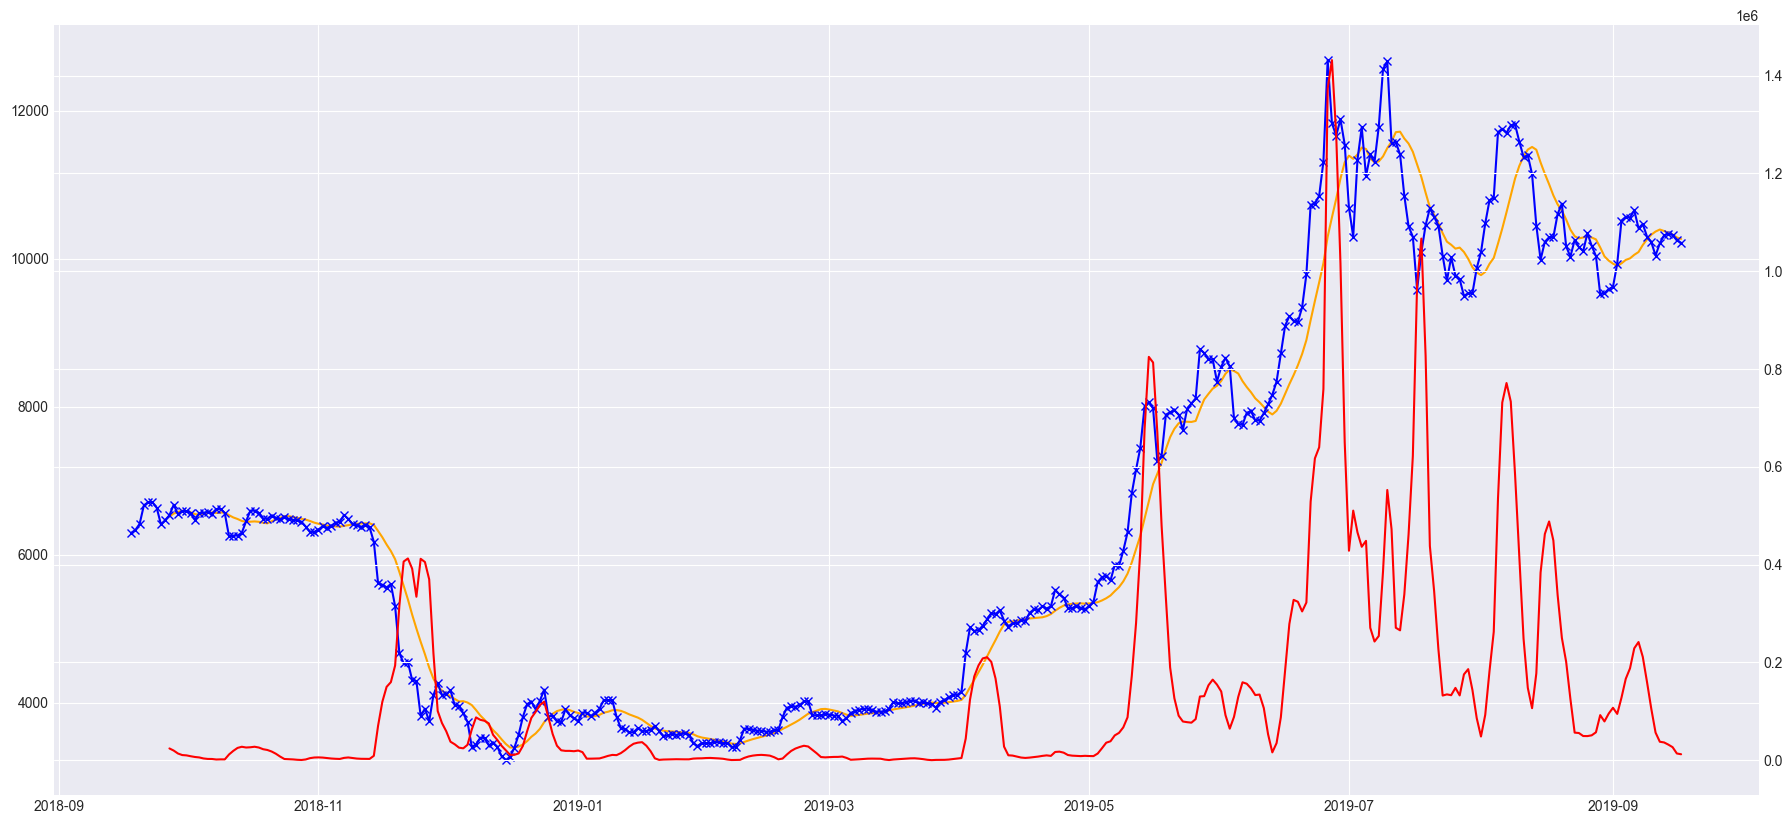

In [35]:
def verif_est_moviles(df, window):
    movil = df.rolling(window=window)
    media_movil = movil.mean()
    var_movil = movil.var()
    
    fig, ax1 = plt.subplots(figsize=(22,10))

    ax1.plot(media_movil, color="orange", label="Medias móviles")
    ax1.plot(df, color="blue", marker="x", label="Observaciones")

    ax2 = ax1.twinx()
    ax2.plot(var_movil, color="red", label="Varianzas móviles")
    
    plt.xlabel("Fecha")
    plt.show()

verif_est_moviles(df, 10)

In [36]:
from statsmodels.tsa.stattools import adfuller

def ver_adfuller(df):
    result = adfuller(df, autolag="AIC")
    print('Test statistic: ', result[0])
    print('p-value: ', result[1])
    print('Critical Values:',result[4])

ver_adfuller(df)

Test statistic:  -0.5239464048172014
p-value:  0.8872581994052411
Critical Values: {'1%': -3.4485948978753314, '5%': -2.86957971128312, '10%': -2.571053050314224}


En el caso que el estadistico sea menor que el valor crítico deseado podemos afirmar que la serie es estacionaria.
En este caso, como podemos observar de las dos formas, deducimos que esta serie no es temporal, intentaremos tunnearla para que podamos trabajar con ella.


# Suavizado.
Como hemos explicado hay dos razones por lo que no es una serie estacionarai:
* La serie tiene *tendencia* -> la media varia con el tiempo
* La *estacionalidad* -> la serie cambia en determinados momentos.

Para poder resolver estos problemas tenemos:
## Suavizado de las medias moviles.
El proceso para realizar este suavizado es haciendo una "media local" entre *k* observaciones, para acto seguido restar a nuestras observaciones los valores de las medias móviles, forzando así a que la tendencia sea nula.
* En el caso de usar *k* menor a cada ciclo de la serie, podremos minimizar la influencia de los valores atípicos.
* En el caso de usar *k* igual al ciclo, podremos visualizar la tendencia que esta serie sigue.

## Serie diferenciada
La idea de este método es hacer el cálculo de la diferencia entre la serie y la serie en un instante anterior.



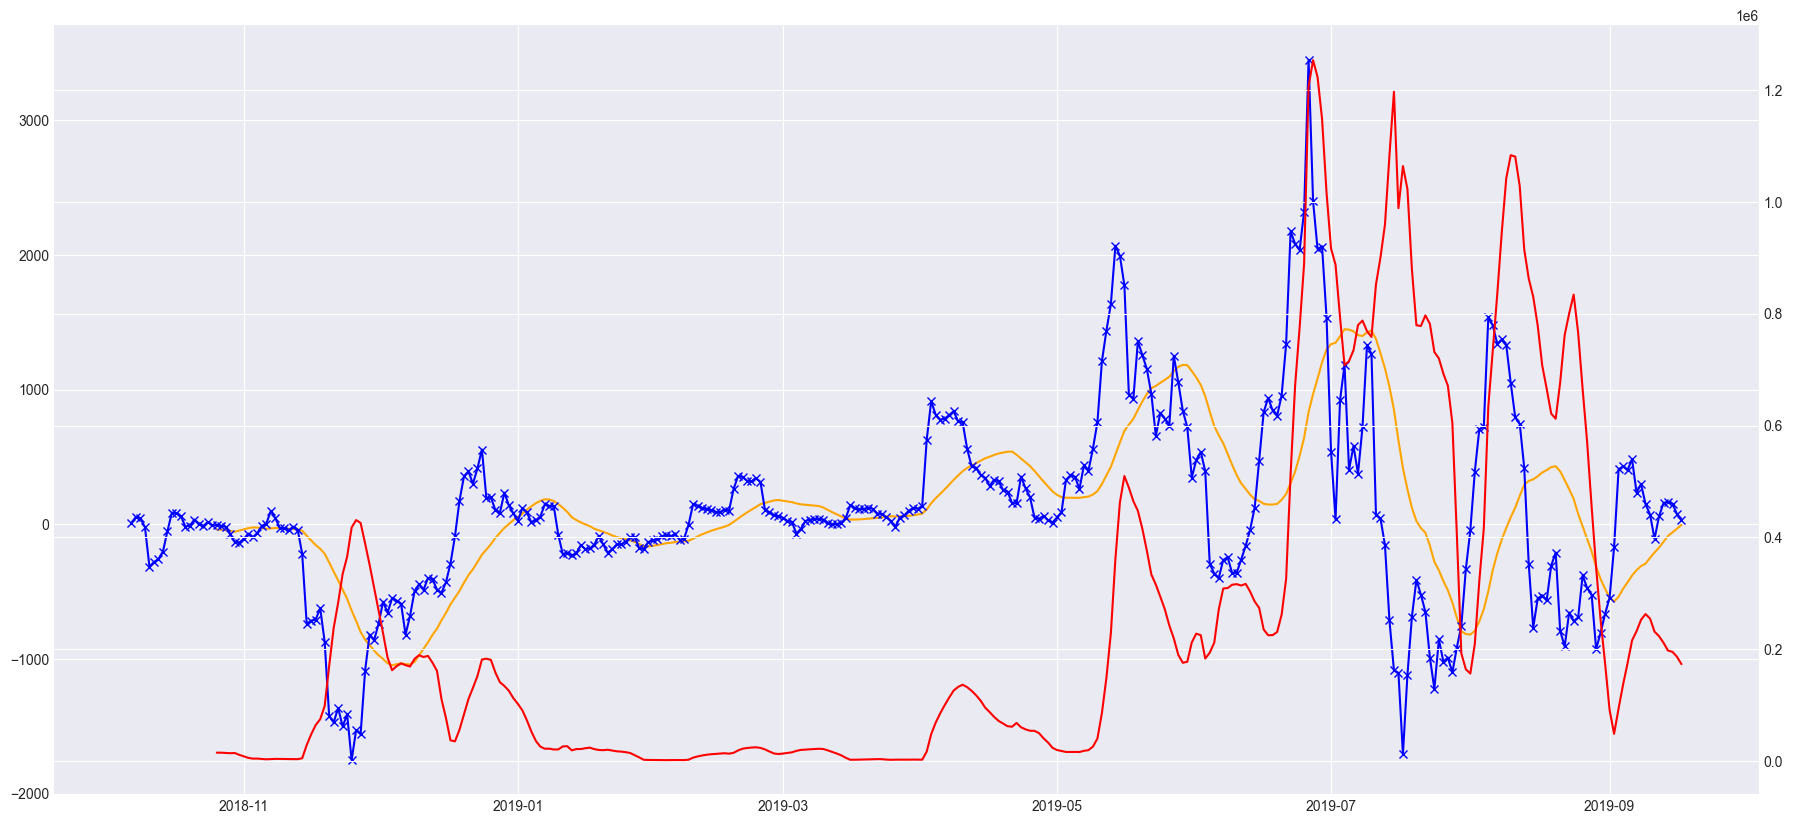

Test statistic:  -4.324896900353153
p-value:  0.0004021220380734719
Critical Values: {'1%': -3.449673193310592, '5%': -2.8700533746644323, '10%': -2.5713055939491403}


In [37]:
# Suavizado de las medias móviles
def medias_moviles(df, window):
    media_movil = df.rolling(window=window).mean()
    diff_media_movil = df - media_movil
    diff_media_movil.dropna(inplace=True)
    return diff_media_movil

window = 20
diff_media_movil = medias_moviles(df, window)
verif_est_moviles(diff_media_movil, window)
ver_adfuller(diff_media_movil)

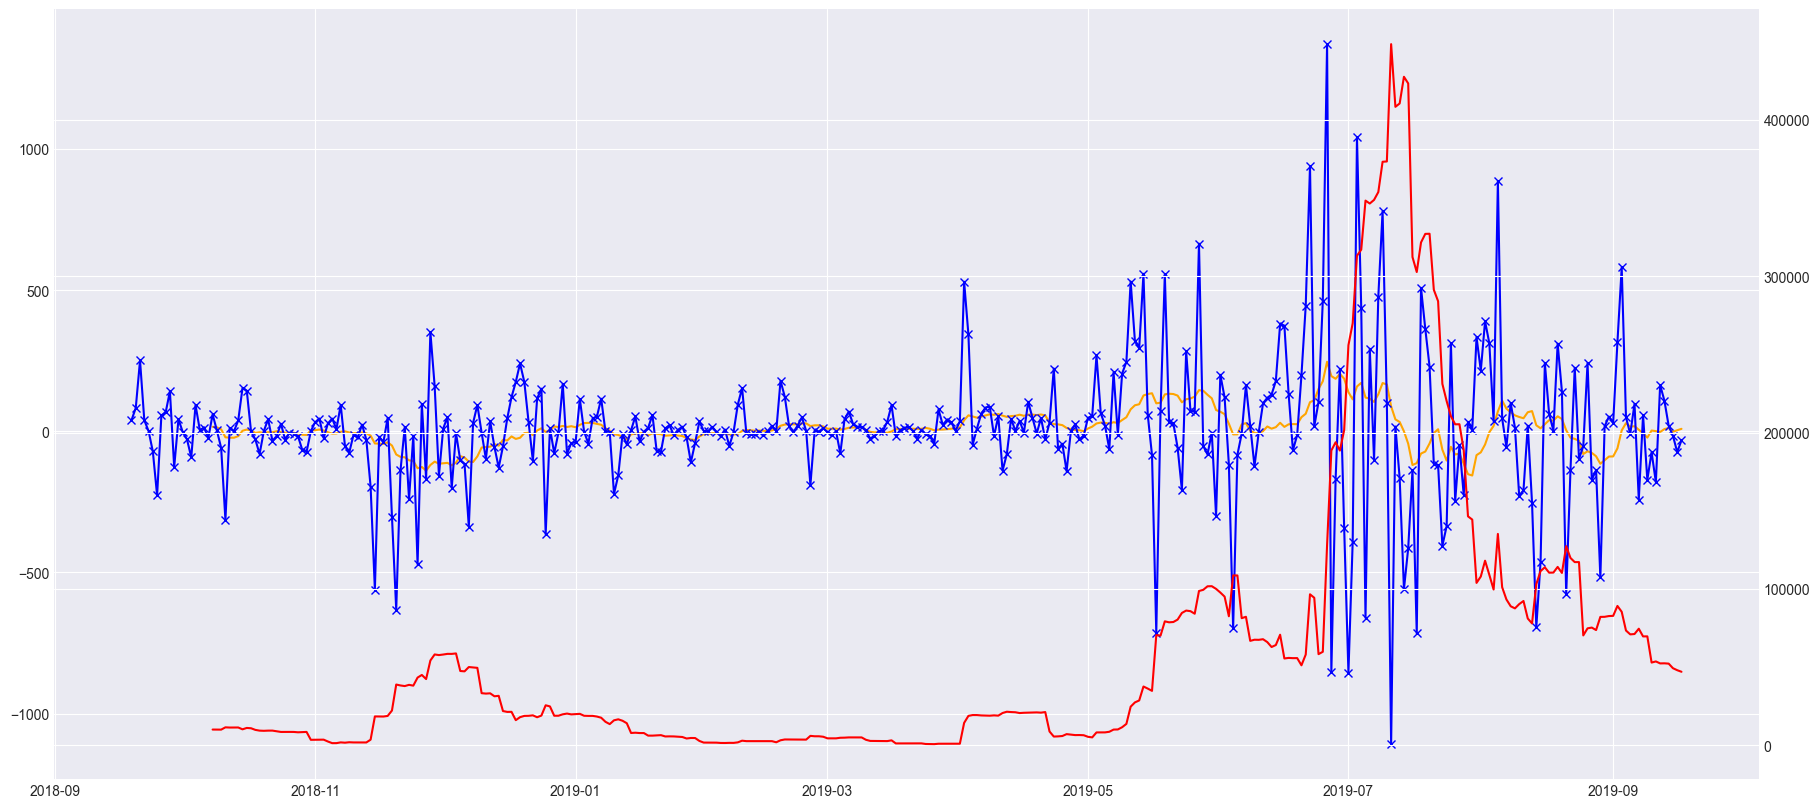

Test statistic:  -10.089614519895962
p-value:  1.1312468815624738e-17
Critical Values: {'1%': -3.4485948978753314, '5%': -2.86957971128312, '10%': -2.571053050314224}


In [38]:
def serie_diferen(df):
    df_diff = df - df.shift()
    df_diff.dropna(inplace=True)
    return df_diff

df_diff = serie_diferen(df)
verif_est_moviles(df_diff, window)
ver_adfuller(df_diff)

# Predicción

In [39]:
import statsmodels.api as sm

modelo_ses = sm.tsa.SimpleExpSmoothing(df, initialization_method="estimated").fit()

predicciones_ses = modelo_ses.forecast(steps=7)
modelo_ses.summary()

Dep. Variable:,PRECIO,No. Observations:,365
Model:,SimpleExpSmoothing,SSE,21335241.204
Optimized:,True,AIC,4010.230
Trend:,None,BIC,4018.030
Seasonal:,None,AICC,4010.341
Seasonal Periods:,None,Date:,"Wed, 19 Mar 2025"
Box-Cox:,False,Time:,21:57:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,6421.0709,l.0,True


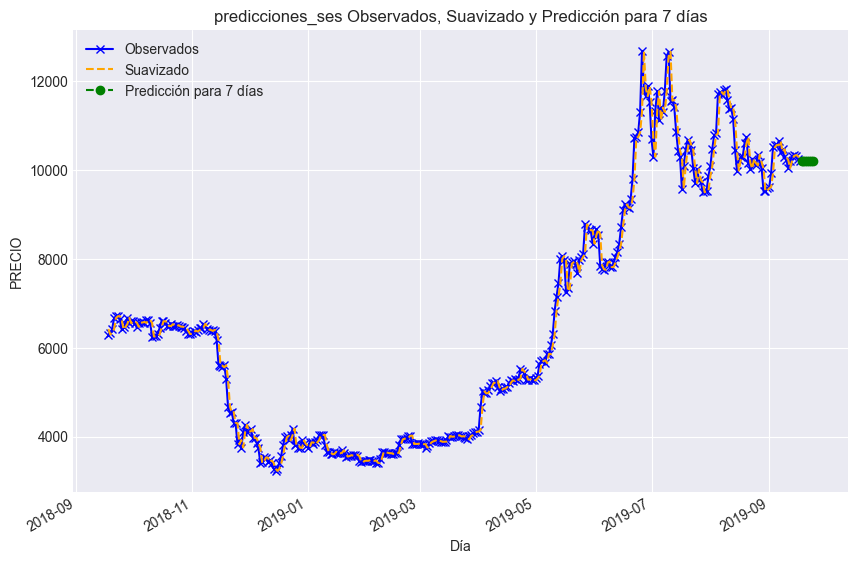

In [40]:
# Crear un gráfico con matplotlib
plt.figure(figsize=(10, 6))
# predicciones_ses observados
plt.plot(df.index, df, label='Observados', marker='x', linestyle='-', color='blue')
# predicciones_ses suavizados (fitted)
plt.plot(df.index, modelo_ses.fittedvalues, label='Suavizado', linestyle='--', color='orange')
# Predicción para 7 días
plt.plot(predicciones_ses.index, predicciones_ses, label='Predicción para 7 días', linestyle='--', marker='o', color='green')
plt.xlabel('Día')
plt.ylabel('PRECIO')
plt.title('predicciones_ses Observados, Suavizado y Predicción para 7 días')
plt.legend()
plt.xticks(rotation=30, ha='right')
plt.show()

## Holt winters

In [41]:
modelo_holt = sm.tsa.ExponentialSmoothing(df, trend="add", damped=False).fit()

predicciones_holt = modelo_holt.forecast(steps=7)

modelo_holt.summary()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9948\2680680486.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  modelo_holt = sm.tsa.ExponentialSmoothing(df, trend="add", damped=False).fit()


Dep. Variable:,PRECIO,No. Observations:,365
Model:,ExponentialSmoothing,SSE,21317154.706
Optimized:,True,AIC,4013.921
Trend:,Additive,BIC,4029.520
Seasonal:,None,AICC,4014.155
Seasonal Periods:,None,Date:,"Wed, 19 Mar 2025"
Box-Cox:,False,Time:,21:57:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9946871,alpha,True
smoothing_trend,0.0004127,beta,True


# ARIMA 
## Autorregresive models AR(p)
Se basa en que el presente se puede modelar usando unicamente los valores pasados de la variable independiente.
$$ x_t = \omega_t + \beta_1 x_{t-1} + \beta_2 x_{t-2} +...+ \beta_n x_{t-n}$$

Un modelo autorregresivo de orden p -> abreviado a AR(p) es de la forma:
$$ x_t = \omega_t + \phi_1 x_{t-1} + \phi_2 x_{t-2} +...+ \phi_p x_{t-p}$$
* Donde $x_t$ es estacionaria y las $\phi$ son constantes, tambien asumiremos que $\omega_t$ es un ruido blanco.
* La media de $x_t$ es 0, en caso de que no sea así, deberemos sustituir $x_t -> x_t - \mu_t$ o escribir lo siguiente:
$$ x_t = \alpha + \omega_t + \phi_1 x_{t-1} + \phi_2 x_{t-2} +...+ \phi_p x_{t-p}$$
donde 
$$ \alpha = \mu(1-\phi_1-...-\phi_p)$$


El valor de **p** es el orden del termino autorregresivo, se refiere al numero de lags que se utilizarán como predictores.

## Integration I(d)

## Función de autocrrelación.
Medida de la correlación entre la serie y la una versión desfasada (o lagged) 

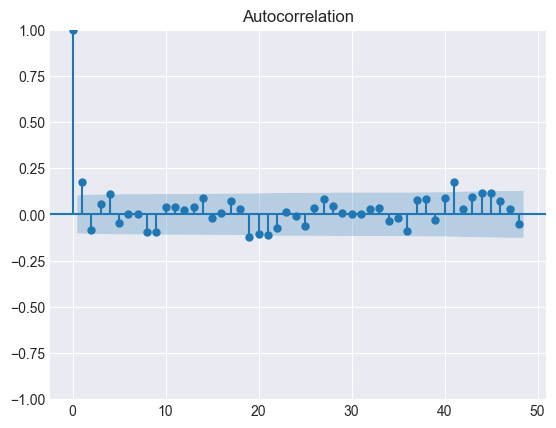

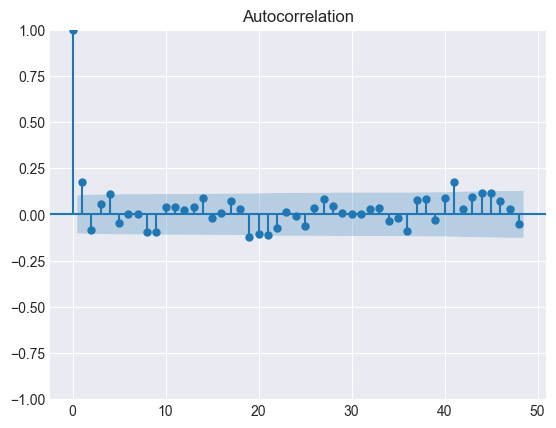

In [42]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

df_acf = acf(df_diff, nlags=20)
plot_acf(df_diff, lags=48, alpha = 0.05)


## Función de Autocorrelación Parcial (PACF)
Mide la correlación entre la serie temporal y su versión desfasada, pero eliminando las variaciones que ya han sido explicadas por las comparaciones intermedias. 
A modo de ejemplo de funcionamiento entre ACF y PACF, si estamos evaluando la relación entre $y_t$ y $y_{t-3}$, la PACF elimina el efecto de $y_{t-2}$ y $y_{t-1}$, dejando solo la correlación directa.

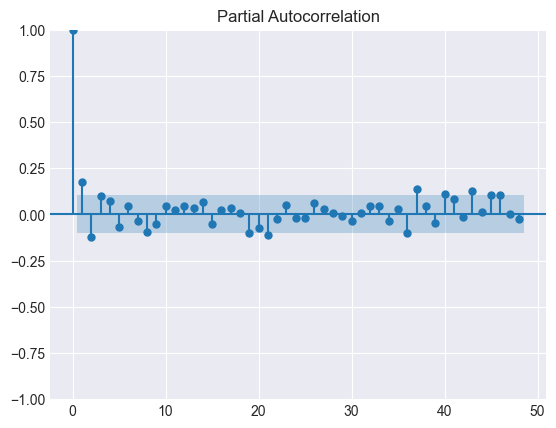

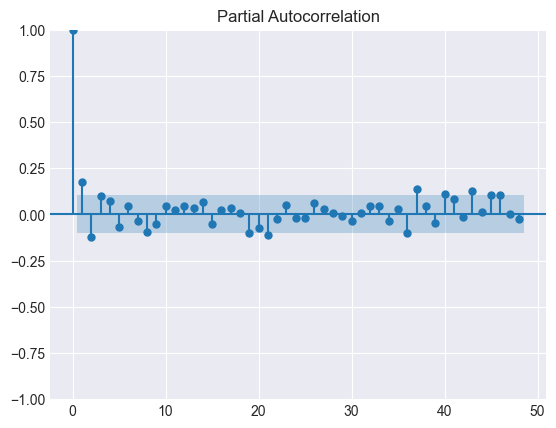

In [43]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

df_pacf = pacf(df_diff, nlags=20)
plot_pacf(df_diff, lags=48, alpha = 0.05)